In [1]:
from analytic_psfs import Mie_Theory
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat

hbar_eVs = 6.58212E-16 # Planck's constant [eV*s]
c = 2.998E+10 # speed of light [cm/s]

95 particles with 10 nm radius
5 particles with 40 nm radius


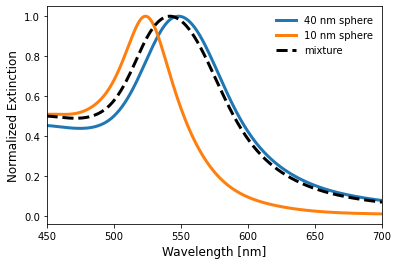

In [19]:
probe = np.arange(400, 701)*1E-7
lmax=10
nb=1.33

radius_big=40.E-7
radius_small=10.E-7

mt = Mie_Theory(radius=radius_big, nb=nb, selected_waves=probe)
abs_cross_big, sca_cross_big, _ = mt.cross_sects(nTOT=lmax)
ext_cross_big = abs_cross_big + sca_cross_big
# plt.plot(probe*1E7, sca_cross_big/max(sca_cross_big),label='big')
plt.plot(probe*1E7, ext_cross_big/max(ext_cross_big),
         label=str(int(np.round(radius_big*1E7))) + str(' nm sphere'),
        linewidth=3)


mt = Mie_Theory(radius=radius_small, nb=nb, selected_waves=probe)
abs_cross_small, sca_cross_small, _ = mt.cross_sects(nTOT=lmax)
# plt.plot(probe*1E7, sca_cross_small/max(sca_cross_small),label='small')
ext_cross_small = abs_cross_small + sca_cross_small
plt.plot(probe*1E7, ext_cross_small/max(ext_cross_small),
         label=str(int(np.round(radius_small*1E7))) + str(' nm sphere'),
        linewidth=3)

fraction=0.05 # 1.0 = 100% big
mixture = ext_cross_small*(1-fraction) + ext_cross_big*fraction
plt.plot(probe*1E7, mixture/max(mixture),'k--',label='mixture',linewidth=3)

plt.legend(frameon=False)
plt.ylabel('Normalized Extinction',fontsize=12)
plt.xlabel('Wavelength [nm]',fontsize=12)
print(int((1-fraction)*100), str('particles with ')+str(int(np.round(radius_small*1E7))) + str(' nm radius'))
print(int(fraction*100), str('particles with ')+str(int(np.round(radius_big*1E7))) + str(' nm radius'))

plt.xlim([450,700]);

Text(0.5, 0, 'Wavelength [nm]')

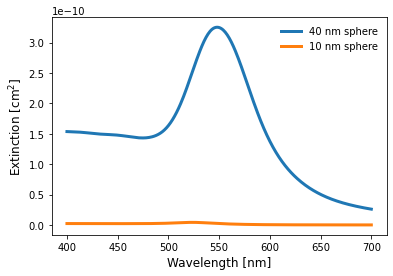

In [12]:
plt.plot(probe*1E7, ext_cross_big,
         label=str(int(np.round(radius_big*1E7))) + str(' nm sphere'),
        linewidth=3)

plt.plot(probe*1E7, ext_cross_small,
         label=str(int(np.round(radius_small*1E7))) + str(' nm sphere'),
        linewidth=3)

plt.legend(frameon=False)
plt.ylabel('Extinction [cm$^2$]',fontsize=12)
plt.xlabel('Wavelength [nm]',fontsize=12)
